In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('future.no_silent_downcasting', True)


In [ ]:
def likert_scale_dict():
    return {
        '5 - Concordo totalmente': 5,
        '4 - Concordo em parte': 4,
        '3 - Nem concordo nem discordo': 3,
        '2 - Discordo em parte': 2,
        '1 - Discordo totalmente': 1
    }

def classify_syndrome(score):
    if score > 80:
        return "Elevado nível da síndrome"
    elif 61 <= score <= 80:
        return "Alto nível da síndrome"
    elif 41 <= score <= 60:
        return "Moderado nível da síndrome"
    else:
        return "Baixos nível da síndrome"

def filter_by_gender(dataframe, gender):
    if gender == 'Masculino':
        df_filtered = dataframe[dataframe['Com qual gênero você se identifica?'] == gender]
        return df_filtered.drop(columns=[col for col in dataframe.columns if "(mulher)" in col])
    elif gender == 'Feminino':
        df_filtered = dataframe[dataframe['Com qual gênero você se identifica?'] == gender]
        return df_filtered.drop(columns=[col for col in dataframe.columns if "(homens)" in col])
    else:
        return dataframe[dataframe['Com qual gênero você se identifica?'] == 'Não binário']




In [ ]:
def remove_gender_suffixes(dataframe):
    dataframe.columns = dataframe.columns.str.replace(r"\s*\(mulher\)", "", regex=True)
    dataframe.columns = dataframe.columns.str.replace(r"\s*\(homens\)", "", regex=True)
    return dataframe

def prepare_data(file_path):
    dataframe = pd.read_csv(file_path)

    dataframe['Com qual gênero você se identifica?'] = dataframe['Com qual gênero você se identifica?'].replace('Prefiro não dizer', 'Não binário')

    last_20_columns = dataframe.columns[-20:]
    dataframe[last_20_columns] = dataframe[last_20_columns].replace(likert_scale_dict()).infer_objects(copy=False)
    dataframe['soma_clance'] = dataframe[last_20_columns].sum(axis=1)
    dataframe['indicativo_sindrome'] = dataframe['soma_clance'].apply(classify_syndrome)

    return dataframe

In [ ]:
file_path = 'dados_forms.csv'
dataframe_from_forms = prepare_data(file_path)

dataframe_from_forms_mens = filter_by_gender(dataframe_from_forms, 'Masculino')
dataframe_from_forms_mens = remove_gender_suffixes(dataframe_from_forms_mens)

dataframe_from_forms_mulheres = filter_by_gender(dataframe_from_forms, 'Feminino')
dataframe_from_forms_mulheres = remove_gender_suffixes(dataframe_from_forms_mulheres)

dataframe_from_forms_unspecified = filter_by_gender(dataframe_from_forms, 'Não binário')
dataframe_from_forms_unspecified = remove_gender_suffixes(dataframe_from_forms_unspecified)

dataframe_from_forms_mens.to_csv('mens.csv', index=False)
dataframe_from_forms_mulheres.to_csv('women.csv', index=False)
dataframe_from_forms_unspecified.to_csv('unspecified_gender.csv', index=False)

print('todos os CSVs foram exportados corretamente :D')


todos os CSVs foram exportados corretamente :D


In [ ]:
mens_df = pd.read_csv('mens.csv')
women_df = pd.read_csv('women.csv')
unspecified_df = pd.read_csv('unspecified_gender.csv')

mens_df.rename(columns={'Com qual gênero você se identifica?': 'genero'}, inplace=True)
women_df.rename(columns={'Com qual gênero você se identifica?': 'genero'}, inplace=True)
unspecified_df.rename(columns={'Com qual gênero você se identifica?': 'genero'}, inplace=True)

common_columns = mens_df.columns.intersection(women_df.columns).tolist()

concatenated_df = pd.concat([mens_df[common_columns], women_df[common_columns], unspecified_df[common_columns]], ignore_index=True)

custom_palette = {
    'Feminino': '#B39DDB',
    'Masculino': '#FFD54F',
    'Não binário': '#A5D6A7'
}




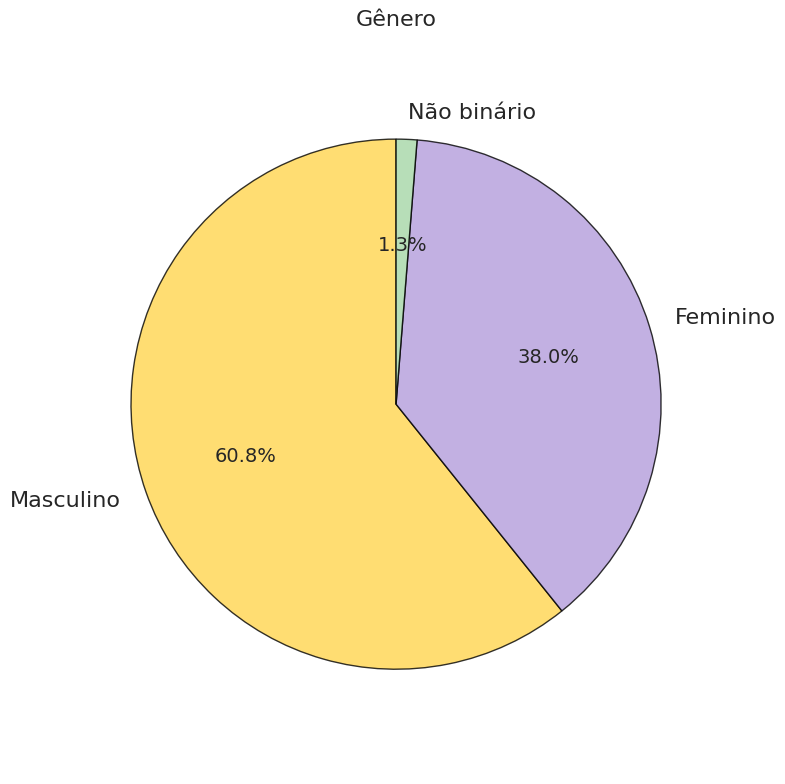

In [ ]:
def plot_gender_distribution_pie_chart(dataframe):
    custom_palette = [ '#FFD54F','#B39DDB', '#A5D6A7']
    genero_counts = dataframe['genero'].value_counts()

    labels = genero_counts.index
    sizes = genero_counts.values

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=custom_palette, autopct='%1.1f%%',
                                      startangle=90, wedgeprops={'edgecolor': 'black', 'alpha': 0.8})


    plt.setp(autotexts, size=14)
    plt.setp(texts, size=16)

    plt.axis('equal')
    plt.title('Gênero', fontsize=16)
    plt.savefig('distribuicao_genero.png', dpi=350)
    plt.tight_layout()
    plt.show()

plot_gender_distribution_pie_chart(concatenated_df)


In [ ]:
def count_and_percentage_age_groups(dataframe, column_name='Idade'):
    
    if column_name in dataframe.columns:
        age_counts = dataframe[column_name].value_counts().sort_index()
        total_count = age_counts.sum()

        age_distribution = pd.DataFrame({
            'Faixa Etária': age_counts.index,
            'Contagem': age_counts.values,
            'Porcentagem': (age_counts.values / total_count) * 100
        })
        return age_distribution
    else:
        raise ValueError(f"A coluna '{column_name}' não foi encontrada no DataFrame.")

age_distribution_df = count_and_percentage_age_groups(concatenated_df, column_name='Idade')

print("Distribuição por Faixa Etária e Porcentagem:")
print(age_distribution_df)

for _, row in age_distribution_df.iterrows():
    print(f"Faixa etária {row['Faixa Etária']}: {row['Contagem']} pessoa(s) ({row['Porcentagem']:.2f}%)")


Distribuição por Faixa Etária e Porcentagem:
  Faixa Etária  Contagem  Porcentagem
0        18-24        65    82.278481
1        25-29        14    17.721519
Faixa etária 18-24: 65 pessoa(s) (82.28%)
Faixa etária 25-29: 14 pessoa(s) (17.72%)


Total de pessoas: 79
Total de pessoas por curso:
Curso
Engenharia de Software    43
Ciência da Computação     36
Name: count, dtype: int64


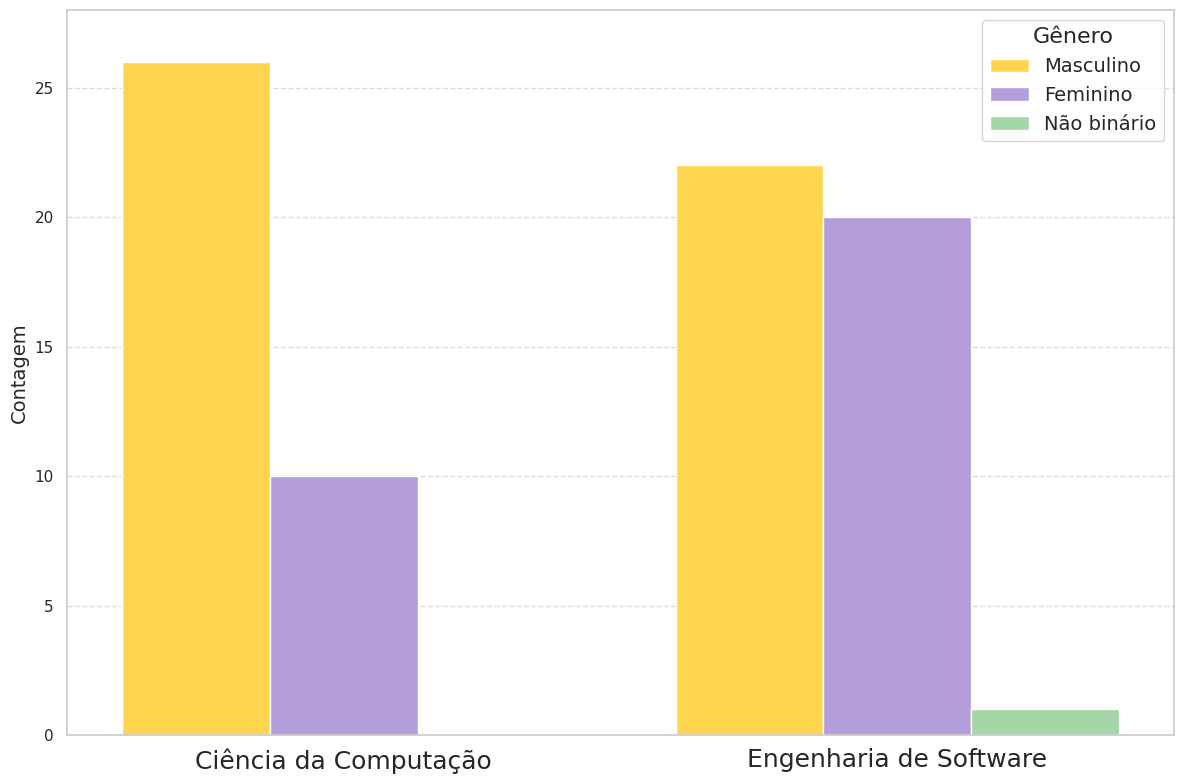

In [ ]:
def plot_course_distribution(dataframe):
    total_pessoas = len(dataframe)

    total_por_curso = dataframe['Curso'].value_counts()

    print(f'Total de pessoas: {total_pessoas}')
    print(f'Total de pessoas por curso:\n{total_por_curso}')

    plt.figure(figsize=(12, 8))

    sns.countplot(data=dataframe, x='Curso', hue='genero', palette=custom_palette, saturation=1)

    plt.ylabel('Contagem', fontsize=14)
    plt.xlabel('')

    plt.xticks(rotation=0, ha='center', fontsize=18)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.ylim(0, 28)

    plt.legend(title='Gênero', fontsize=14, title_fontsize=16, loc='upper right')

    plt.tight_layout()

    plt.savefig('distribuicao_cursos_por_genero_horizontal.png', dpi=350, bbox_inches='tight')

    plt.show()


plot_course_distribution(concatenated_df)


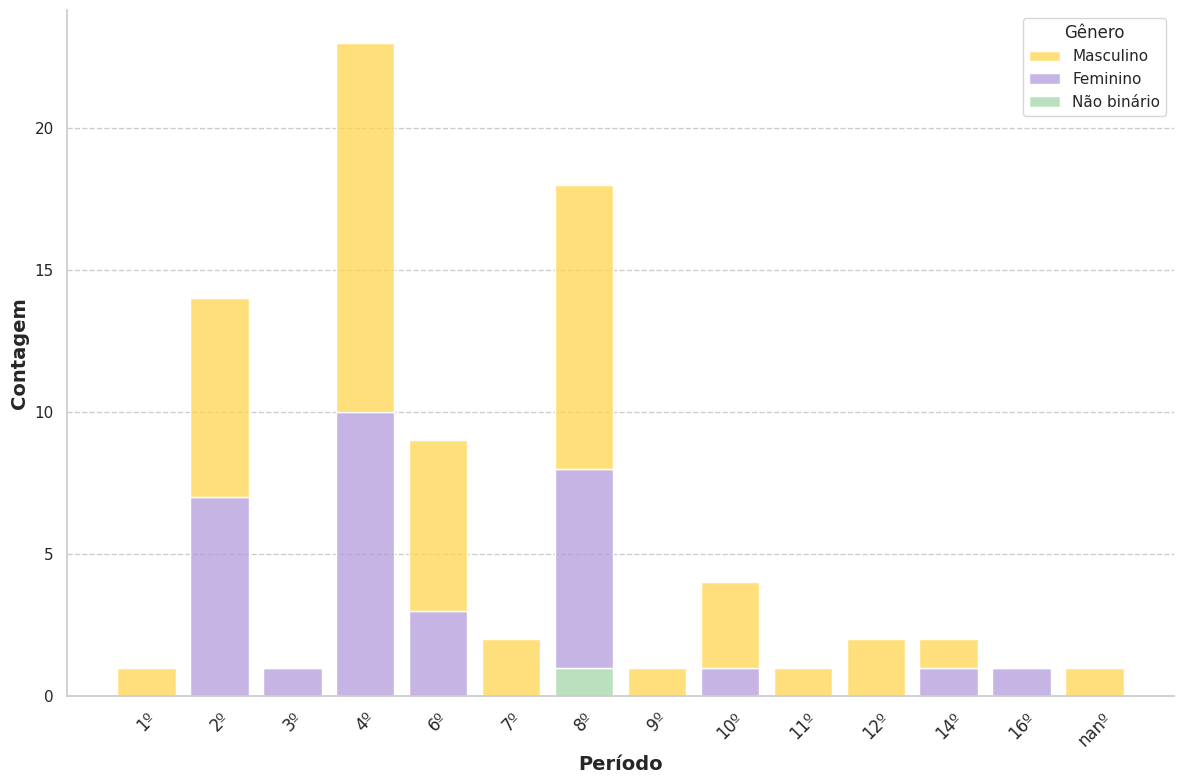

In [ ]:

def plot_period_distribution_stacked(dataframe):
    plt.figure(figsize=(12, 8))

    dataframe['Período'] = dataframe['Período'].astype(str).str.replace(r'\.0$', '', regex=True)

    unique_periods = sorted(dataframe['Período'].dropna().unique(), key=lambda x: float(x) if x.replace('.', '', 1).isdigit() else float('inf'))

    if len(unique_periods) > 1:
        segundo_periodo = unique_periods[1]  # Segundo período na lista
        dataframe['Período'] = dataframe['Período'].fillna(segundo_periodo)  # Substituir NaN pelo segundo período

    dataframe['Período'] = pd.Categorical(
        dataframe['Período'],
        ordered=True,
        categories=sorted(dataframe['Período'].unique(), key=lambda x: float(x) if x.replace('.', '', 1).isdigit() else float('inf'))
    )

    sns.set(style="whitegrid")

    dataframe = dataframe.rename(columns={'genero': 'Gênero'})

    ax = sns.histplot(
        data=dataframe,
        x='Período',
        hue='Gênero',
        multiple='stack',
        palette=custom_palette,
        shrink=0.8,
        discrete=True,
        edgecolor=None
    )

    periods = dataframe['Período'].cat.categories
    ordinal_labels = [f"{p}º" for p in periods]

    ax.set_xticks(range(len(periods)))
    ax.set_xticklabels(ordinal_labels, rotation=45, ha='center', fontsize=12)

    plt.xlabel('Período', fontsize=14, weight='bold')
    plt.ylabel('Contagem', fontsize=14, weight='bold')

    plt.grid(axis='y', linestyle='--')
    ax.grid(False, axis='x')

    plt.tight_layout()

    sns.despine()

    plt.show()

plot_period_distribution_stacked(concatenated_df)


<Figure size 1300x600 with 0 Axes>

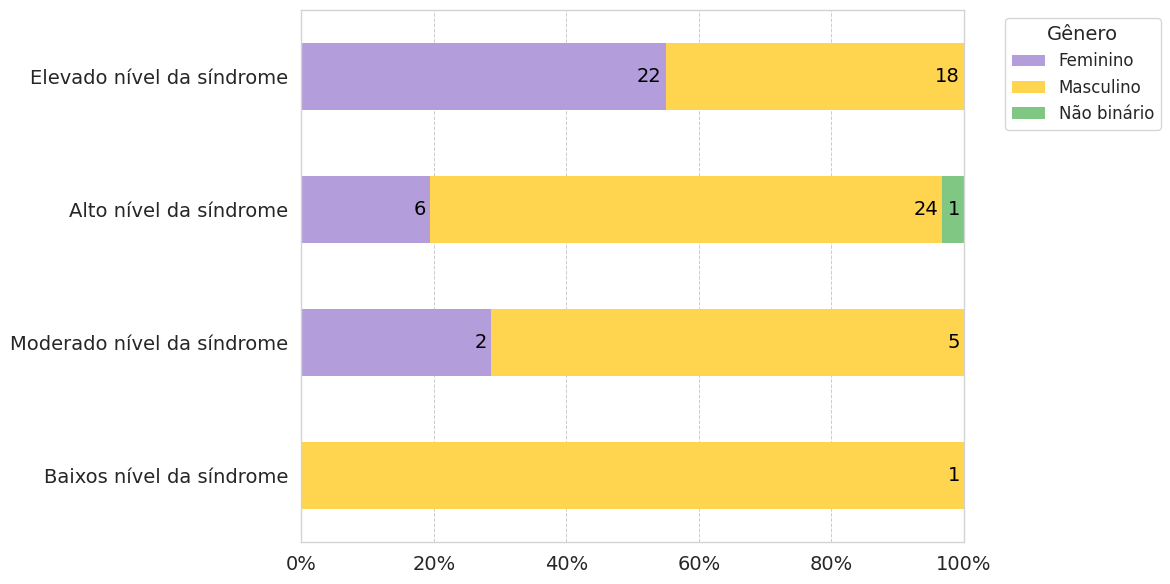

In [ ]:
import matplotlib.ticker as mtick

def plot_syndrome_distribution_combined(dataframe):
    plt.figure(figsize=(13, 6))

    ordem_indicativo = ['Baixos nível da síndrome', 'Moderado nível da síndrome', 'Alto nível da síndrome', 'Elevado nível da síndrome']

    grouped_data = dataframe.groupby(['indicativo_sindrome', 'genero']).size().unstack(fill_value=0)
    grouped_data = grouped_data.reindex(ordem_indicativo)

    grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    custom_palette = ['#B39DDB', '#FFD54F', '#81C784']

    ax = grouped_data_percentage.plot(
        kind='barh', stacked=True, color=custom_palette, figsize=(12, 6), width=0.5,
        edgecolor='none',
        zorder=2
    )

    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.xaxis.set_major_formatter(mtick.PercentFormatter())

    ax.xaxis.grid(True, which='major', linestyle='--', linewidth=0.7, zorder=1)

    plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

    for index in range(grouped_data.shape[0]):
        start = 0
        for i in range(grouped_data.shape[1]):
            value = grouped_data.iloc[index, i]
            if value > 0:
                end = start + grouped_data_percentage.iloc[index, i]
                plt.text(end - 0.6, index, f'{int(value)}', color='black', va='center', ha='right', fontsize=14)  # Ajustar o tamanho dos números dentro das barras
            start += grouped_data_percentage.iloc[index, i]

    for spine in ax.spines.values():
        spine.set_edgecolor('lightgray') 
        spine.set_linewidth(1) 

    plt.tight_layout()
    plt.xlim(0, 100)
    plt.show()

plot_syndrome_distribution_combined(concatenated_df)


In [ ]:
mens_mean = mens_df['soma_clance'].mean()
women_mean = women_df['soma_clance'].mean()
non_binary_mean = unspecified_df['soma_clance'].mean()

mens_classification = classify_syndrome(mens_mean)
women_classification = classify_syndrome(women_mean)
non_binary_classification = classify_syndrome(non_binary_mean)

print(f'A média das somas das mulheres foi {women_mean:.2f}, classificando como: {women_classification}.')
print(f'A média das somas dos homens foi {mens_mean:.2f}, classificando como: {mens_classification}.')
print(f'A média das somas dos não-binários foi {non_binary_mean:.2f}, classificando como: {non_binary_classification}.')


A média das somas das mulheres foi 82.30, classificando como: Elevado nível da síndrome.
A média das somas dos homens foi 75.48, classificando como: Alto nível da síndrome.
A média das somas dos não-binários foi 77.00, classificando como: Alto nível da síndrome.


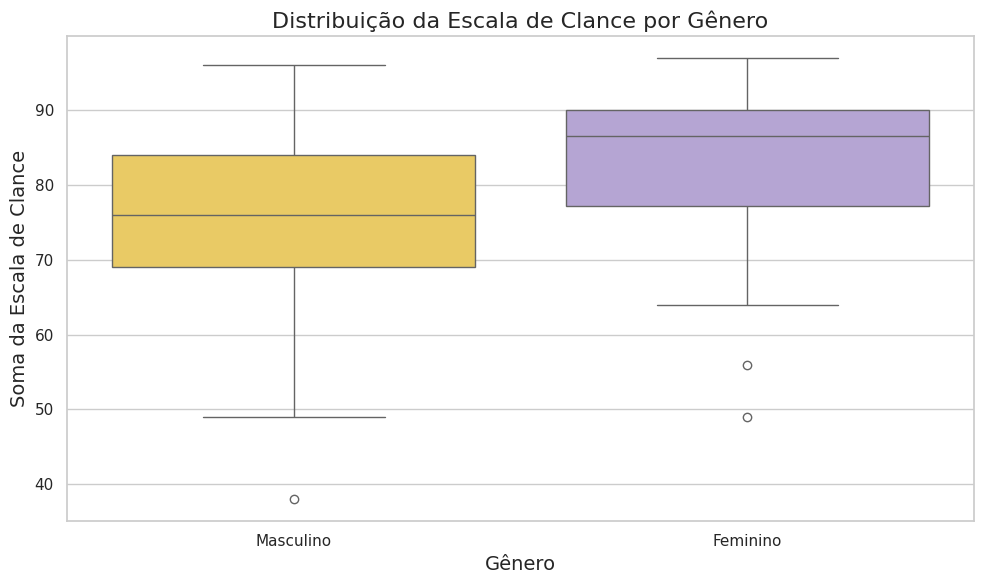

In [ ]:

mens_df['genero'] = 'Masculino'
women_df['genero'] = 'Feminino'

data = pd.concat([mens_df[['soma_clance', 'genero']], women_df[['soma_clance', 'genero']]])

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='genero', y='soma_clance', palette=custom_palette)
plt.title('Distribuição da Escala de Clance por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Soma da Escala de Clance', fontsize=14)
plt.tight_layout()
plt.show()


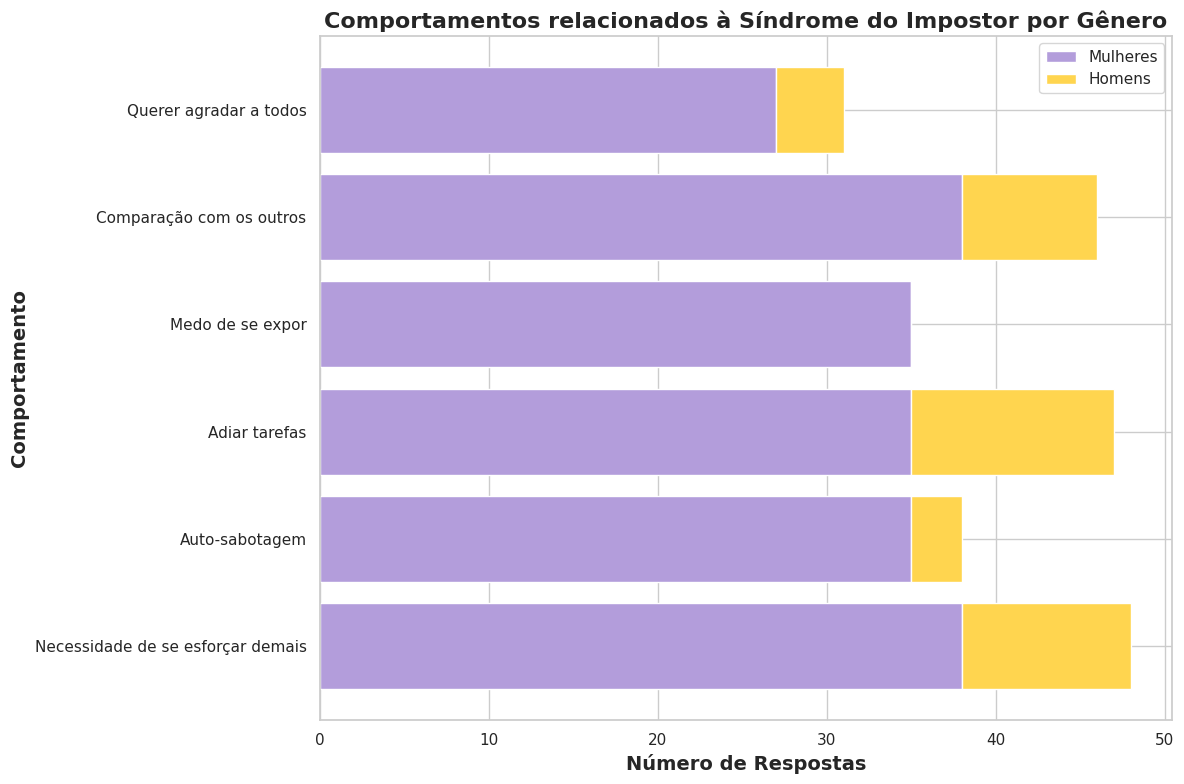

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

comportamentos = ['Necessidade de se esforçar demais', 'Auto-sabotagem', 'Adiar tarefas',
                  'Medo de se expor', 'Comparação com os outros', 'Querer agradar a todos']
respostas_mulheres = [38, 35, 35, 35, 38, 27]
respostas_homens = [48, 38, 47, 29, 46, 31]

data = {
    'Comportamento': comportamentos,
    'Mulheres': respostas_mulheres,
    'Homens': respostas_homens
}

df = pd.DataFrame(data)

def plot_comportamento_distribution_stacked(df):
    plt.figure(figsize=(12, 8))

    sns.set(style="whitegrid")

    plt.barh(df['Comportamento'], df['Mulheres'], color='#B39DDB', label='Mulheres')

    diff = df['Homens'] - df['Mulheres']
    plt.barh(df['Comportamento'], diff.where(diff > 0, 0), left=df['Mulheres'], color='#FFD54F', label='Homens')

    plt.xlabel('Número de Respostas', fontsize=14, weight='bold')
    plt.ylabel('Comportamento', fontsize=14, weight='bold')
    plt.title('Comportamentos relacionados à Síndrome do Impostor por Gênero', fontsize=16, weight='bold')

    plt.legend()

    plt.tight_layout()

    plt.show()

plot_comportamento_distribution_stacked(df)
